In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = iris["data"][ : , 2: ]    # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)

In [5]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

In [6]:
svm_pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_pipeline.predict([[5.5, 1.7]])

array([1.])

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(noise = 0.15, random_state = 42)
#print(X)

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt


def plot_data(X, y, axes):
    plt.plot(X[ : , 0][y == 0], X[ : , 1][y == 0], "b^")
    plt.plot(X[ : , 0][y == 1], X[ : , 1][y == 1], "rs")
    plt.axis(axes)
    plt.grid()



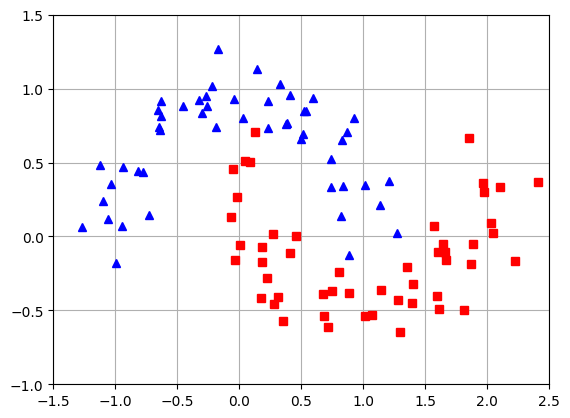

In [10]:
plot_data(X, y, [-1.5, 2.5, -1, 1.5])

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


poly_svm_pipe = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_classifier", LinearSVC(C = 10, loss = "hinge", max_iter = 10000))
])

poly_svm_pipe.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_classifier',
                 LinearSVC(C=10, loss='hinge', max_iter=10000))])

In [19]:
def plot_predictions(classifier, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = classifier.predict(X).reshape(x0.shape)
    y_decision = classifier.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)

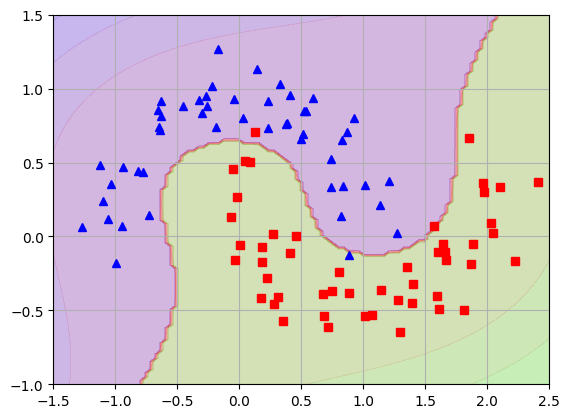

In [20]:
plot_predictions(poly_svm_pipe, [-1.5, 2.5, -1, 1.5])
plot_data(X, y, [-1.5, 2.5, -1, 1.5])

In [38]:
from sklearn.svm import SVC

poly_kernel_svm_class = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_class", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
])

poly_kernel_svm_class.fit(X, y)




Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_class', SVC(C=5, coef0=1, kernel='poly'))])

In [39]:
560 - 170

390

In [40]:
170/560*100

30.357142857142854